# Laboratory Work #2 "Data exploration and visualization with Python"
## Executed by student of group KN-222b.e. Miniailo Dmytro

**Objective:** Gain basic skills in using Python for data exploration and visualization

### Choosing variant

In [4]:
N = ord("D") % 3 + 1

print(N)

3


### Creating functions

#### Libraries used in the tasks

In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

#### Task 1: Create a function, that takes filename and column name as a parameter and return a numpy array of a column values

In [9]:
def load_column_as_array(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)
        col_index = headers.index(column_name)
        column_data = [row[col_index] for row in reader if row[col_index]]
        
    if column_name == 'date':
        return np.array(column_data)
    else:
        return np.array(column_data, dtype=int)

#### Task 2: Using function from task 1, create a numpy array out of values of “APC”

In [11]:
apc = load_column_as_array('russia_losses_equipment.csv', 'APC')
print(apc)

[17679 17658 17627 17596 17579 17547 17503 17476 17438 17396 17344 17304
 17292 17252 17222 17170 17132 17093 17080 17077 17071 17063 17043 17003
 16955 16938 16925 16906 16897 16878 16878 16869 16848 16821 16786 16760
 16736 16722 16699 16681 16667 16648 16631 16620 16599 16567 16542 16521
 16495 16480 16473 16461 16426 16402 16385 16368 16363 16350 16341 16332
 16323 16294 16286 16255 16238 16211 16203 16161 16141 16103 16095 16074
 16050 16039 16013 16000 15980 15963 15917 15902 15883 15871 15862 15826
 15811 15779 15755 15732 15715 15704 15685 15645 15629 15611 15600 15583
 15566 15550 15524 15505 15480 15459 15450 15431 15413 15398 15383 15372
 15337 15319 15307 15287 15269 15263 15234 15208 15187 15176 15144 15131
 15105 15096 15076 15036 15020 15002 14980 14947 14935 14913 14891 14858
 14818 14803 14786 14775 14748 14721 14699 14665 14630 14595 14552 14538
 14508 14460 14417 14375 14353 14313 14281 14246 14227 14213 14179 14156
 14129 14096 14067 14046 14007 13991 13971 13957 13

#### Task 3: Find daily APC losses

In [13]:
def calculate_daily_losses(apc_data):
    return np.diff(apc_data)

In [14]:
daily_losses = calculate_daily_losses(apc)

print(daily_losses)

[ -21  -31  -31  -17  -32  -44  -27  -38  -42  -52  -40  -12  -40  -30
  -52  -38  -39  -13   -3   -6   -8  -20  -40  -48  -17  -13  -19   -9
  -19    0   -9  -21  -27  -35  -26  -24  -14  -23  -18  -14  -19  -17
  -11  -21  -32  -25  -21  -26  -15   -7  -12  -35  -24  -17  -17   -5
  -13   -9   -9   -9  -29   -8  -31  -17  -27   -8  -42  -20  -38   -8
  -21  -24  -11  -26  -13  -20  -17  -46  -15  -19  -12   -9  -36  -15
  -32  -24  -23  -17  -11  -19  -40  -16  -18  -11  -17  -17  -16  -26
  -19  -25  -21   -9  -19  -18  -15  -15  -11  -35  -18  -12  -20  -18
   -6  -29  -26  -21  -11  -32  -13  -26   -9  -20  -40  -16  -18  -22
  -33  -12  -22  -22  -33  -40  -15  -17  -11  -27  -27  -22  -34  -35
  -35  -43  -14  -30  -48  -43  -42  -22  -40  -32  -35  -19  -14  -34
  -23  -27  -33  -29  -21  -39  -16  -20  -14  -15  -14  -12  -12   -8
  -23  -21  -17   -8  -18  -13  -31  -20  -47  -19  -12  -47  -45  -24
  -54  -38  -73  -18  -18  -29  -17  -20  -20  -27  -21   -9  -24  -25
  -28 

#### Task 4: Find the 5 greatest daily losses of APC

In [16]:
def top_5_greatest_losses(daily_losses):
    return np.sort(daily_losses)[:5][::1]

In [17]:
top_5_greatest_losses(daily_losses)

array([-190, -120, -110,  -96,  -91])

#### Task 5: Determine how many APC were destroyed in the summer of 2024

In [19]:
def summer_2024_losses(filename, column):
    losses_data = load_column_as_array(filename, column)
    date_data = load_column_as_array(filename, 'date')
    date_dt = np.array([datetime.strptime(date, '%Y-%m-%d') for date in date_data])
    
    summer_mask = (date_dt >= datetime(2024, 6, 1)) & (date_dt <= datetime(2024, 8, 31))
    summer_losses = losses_data[summer_mask]
    
    return np.sum(summer_losses)

In [20]:
summer_2024_losses('russia_losses_equipment.csv', 'APC')

1459103

#### Task 6: Find the mean value of destroyed APC between 100 and 500 days of war

In [22]:
def mean_losses_between_days(apc_data, start_day, end_day):
    selected_data = apc_data[start_day-1:end_day]
    return int(np.mean(selected_data))

In [23]:
mean_losses_between_days(apc, 100, 500)

10935

#### Task 7: Create a plot of APC losses of last 200 days (starting from last date in 
dataset)

In [25]:
def plot_last_200_days(apc_data, date_data):
    last_200_losses = apc_data[-200:]
    last_200_days = date_data[-200:]
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(last_200_days, last_200_losses, linestyle='dotted', color='blue', label='Daily APC Losses')
    plt.xlabel('Date')
    plt.ylabel('APC Losses')
    plt.xticks(ticks=range(0, 200, 25), labels=last_200_days[::25], rotation=45)
    plt.title('APC Losses Over the Last 200 Days')
    plt.legend(loc="upper right")
    plt.grid(color='gray', linestyle='--')
    plt.savefig('apc_losses_last_200_days.png')
    plt.show()

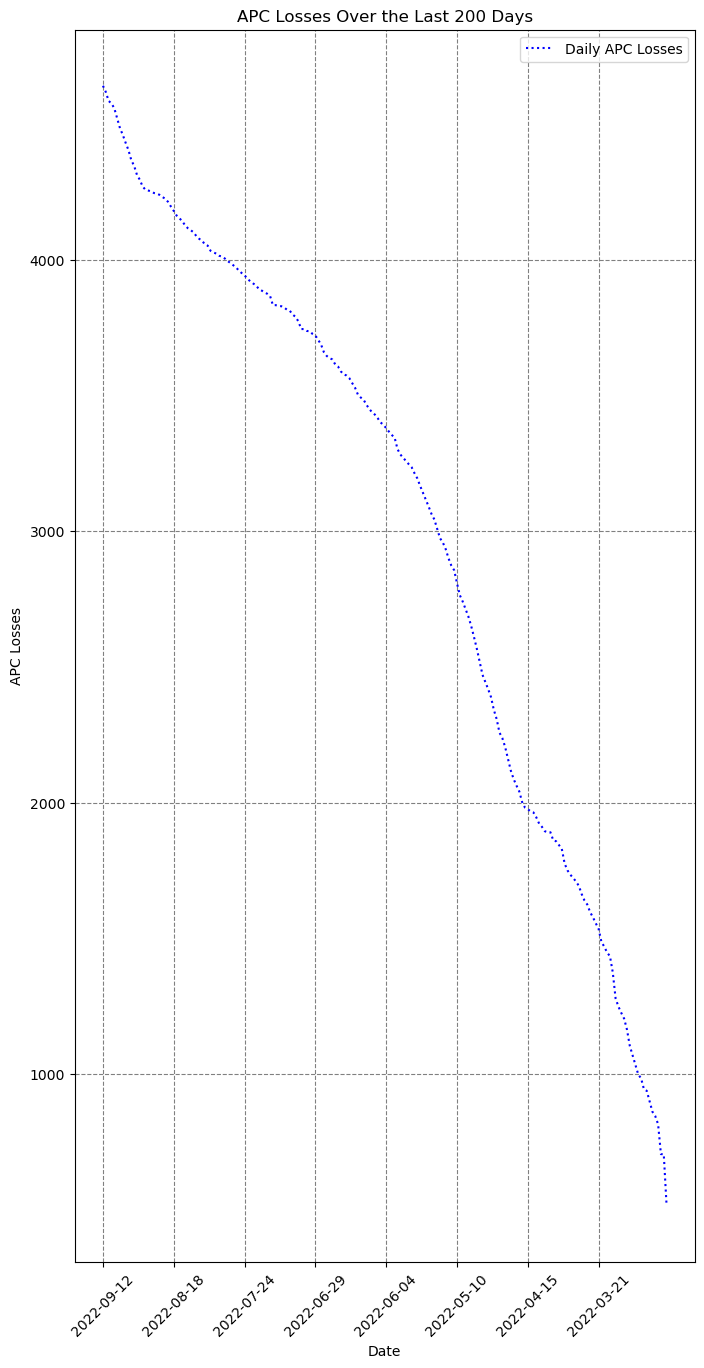

In [26]:
plot_last_200_days(apc, load_column_as_array('russia_losses_equipment.csv', 'date'))

**Conclusion:** During this laboratory work, I was gaining skills of working with data exploration and visualization using Python and Jupyter Notebook.